In [2]:
import pygrib
import xarray as xr
import numpy as np
from netCDF4 import Dataset
import numexpr as ne
import wrf
from wrf import getvar, interplevel

In [2]:
from ftplib import FTP
ftp = FTP('202.90.199.77')
ftp.login(user='transmet2023', passwd='99xrAQbW2qN7h')
ftp.cwd('/INANWP/')

'250 OK. Current directory is /INANWP'

In [3]:
def grabFile():

    filename = 'wrfout_d01_2024-01-27_00:00:00'

    localfile = open(filename, 'wb')
    ftp.retrbinary('RETR ' + filename, localfile.write, 1024)

    ftp.quit()
    localfile.close()

In [4]:
grabFile()

In [5]:
a = np.zeros((3,3,3))
b = np.zeros((3,3,3))

In [19]:
x = [[1,1,3],
     [11,1,3],
     [1,31,3]]
y = [[5,3,3],
     [11,1,3],
     [1,31,3]]

z= [[[1,1,3],
     [11,1,3]],
     [[5,3,3],
     [11,1,3]]]

a[0,:,:], b[0,:,:] = x,y

In [23]:
np.shape(z)

(2, 2, 3)

In [26]:
np.shape(a[:,:-1,:] )

(3, 2, 3)

In [27]:
import netCDF4
import numpy as np

def calculate_wind_gust(wrfout_file):

    # Open the NetCDF file
    nc = netCDF4.Dataset(wrfout_file)
    
    # Extract needed variables
    u10 = nc.variables['U10'][:] 
    v10 = nc.variables['V10'][:]
    
    # Calculate the 10m wind speed  
    wind10 = np.sqrt(u10**2 + v10**2)

    # Empirical equation to compute gust
    gust_factor = 0.43 + (0.097 * wind10) 

    # Compute final gust speed  
    surface_gust = gust_factor * wind10

    return surface_gust

In [28]:
def remask(var,varmask):
    import numpy.ma as ma
    masktemp = varmask.mask
    var = ma.masked_array(var,mask=masktemp)
    return var

In [29]:
surface_gust = calculate_wind_gust(path)

NameError: name 'path' is not defined

In [ ]:
gust = remask(surface_gust, surface_gust)

In [ ]:
np.shape(gust)

(25, 311, 620)

In [ ]:
gust.data == surface_gust.data

array([[[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True]],

       [[ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  True,  True],
        ...,
        [ True,  True,  True, ...,  True,  True,  True],
        [ True,  True,  True, ...,  True,  Tr

In [3]:
ds = xr.open_dataset('/tmp/INANWP/wrfout_d01_2024-01-31_00:00:00')

In [4]:
ds

<xarray.Dataset>
Dimensions:                (Time: 25, bottom_top: 49, bottom_top_stag: 50, seed_dim_stag: 2, soil_layers_stag: 4, south_north: 311, south_north_stag: 312, west_east: 620, west_east_stag: 621)
Coordinates:
    XLAT                   (Time, south_north, west_east) float32 ...
    XLONG                  (Time, south_north, west_east) float32 ...
    XTIME                  (Time) datetime64[ns] ...
    XLAT_U                 (Time, south_north, west_east_stag) float32 ...
    XLONG_U                (Time, south_north, west_east_stag) float32 ...
    XLAT_V                 (Time, south_north_stag, west_east) float32 ...
    XLONG_V                (Time, south_north_stag, west_east) float32 ...
Dimensions without coordinates: Time, bottom_top, bottom_top_stag, seed_dim_stag, soil_layers_stag, south_north, south_north_stag, west_east, west_east_stag
Data variables:
    Times                  (Time) |S19 ...
    LU_INDEX               (Time, south_north, west_east) float32 ...
    ZNU                    (Time, bottom_top) float32 ...
    ZNW                    (Time, bottom_top_stag) float32 ...
    ZS                     (Time, soil_layers_stag) float32 ...
    DZS                    (Time, soil_layers_stag) float32 ...
    VAR_SSO                (Time, south_north, west_east) float32 ...
    U                      (Time, bottom_top, south_north, west_east_stag) float32 ...
    V                      (Time, bottom_top, south_north_stag, west_east) float32 ...
    W                      (Time, bottom_top_stag, south_north, west_east) float32 ...
    PH                     (Time, bottom_top_stag, south_north, west_east) float32 ...
    PHB                    (Time, bottom_top_stag, south_north, west_east) float32 ...
    T                      (Time, bottom_top, south_north, west_east) float32 ...
    THM                    (Time, bottom_top, south_north, west_east) float32 ...
    HFX_FORCE              (Time) float32 ...
    LH_FORCE               (Time) float32 ...
    TSK_FORCE              (Time) float32 ...
    HFX_FORCE_TEND         (Time) float32 ...
    LH_FORCE_TEND          (Time) float32 ...
    TSK_FORCE_TEND         (Time) float32 ...
    MU                     (Time, south_north, west_east) float32 ...
    MUB                    (Time, south_north, west_east) float32 ...
    NEST_POS               (Time, south_north, west_east) float32 ...
    P                      (Time, bottom_top, south_north, west_east) float32 ...
    PB                     (Time, bottom_top, south_north, west_east) float32 ...
    FNM                    (Time, bottom_top) float32 ...
    FNP                    (Time, bottom_top) float32 ...
    RDNW                   (Time, bottom_top) float32 ...
    RDN                    (Time, bottom_top) float32 ...
    DNW                    (Time, bottom_top) float32 ...
    DN                     (Time, bottom_top) float32 ...
    CFN                    (Time) float32 ...
    CFN1                   (Time) float32 ...
    THIS_IS_AN_IDEAL_RUN   (Time) int32 ...
    P_HYD                  (Time, bottom_top, south_north, west_east) float32 ...
    Q2                     (Time, south_north, west_east) float32 ...
    T2                     (Time, south_north, west_east) float32 ...
    TH2                    (Time, south_north, west_east) float32 ...
    PSFC                   (Time, south_north, west_east) float32 ...
    U10                    (Time, south_north, west_east) float32 ...
    V10                    (Time, south_north, west_east) float32 ...
    RDX                    (Time) float32 ...
    RDY                    (Time) float32 ...
    AREA2D                 (Time, south_north, west_east) float32 ...
    DX2D                   (Time, south_north, west_east) float32 ...
    RESM                   (Time) float32 ...
    ZETATOP                (Time) float32 ...
    CF1                    (Time) float32 ...
    CF2                    (Time) float32 ...
    CF3                    (T

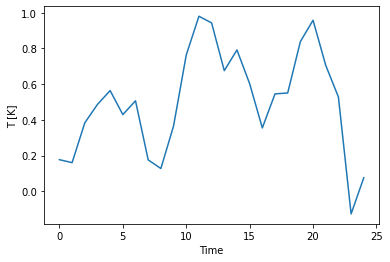

In [5]:
ds['T'][:,5,100,100].plot()

In [37]:
ds['T'][:,:-1,:,:] = a

array([[[[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         ...,
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ]],

        [[  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         ...,
         [  0.     ,   0.     ,   0.     , ...,   0.     ,   0.     ,
            0.     ],
         [  0.     ,   0.     ,   0.     , ...,   

In [6]:
dts =  Dataset("wrfout_d01_2024-01-07_12:00:00")

OSError: [Errno -51] NetCDF: Unknown file format: b'wrfout_d01_2024-01-07_12:00:00'

In [ ]:
# Extract 500 mb temperature
t500 = ncdf.variables['T'][0,5,:,:]  

# Extract 850 mb temperature & dewpoint
t850 = ncdf.variables['T'][0,0,:,:]  
td850 = ncdf.variables['TD'][0,0,:,:]

# Lifted parcel calculation 
parcel_t = t850 + (8000 - 500)/(3000 - (td850-t850)) * (td850-t850)  

# Calculate Showalter Index
showalter_index = t500 - parcel_t

In [18]:
rh = getvar(dts,'rh')

In [36]:
def calculate_0_degree_isothermal(ds):
    # Open WRF output file using xarray

    # Extract temperature variable
    temperature = ds['T'][0,:,:,:]  # T for potential temperature in WRF

    # Find the height where temperature is closest to 0 degrees Celsius
    zero_degree_isothermal_level = temperature.where(np.isclose(temperature, 0, atol=0.1), drop=True).mean(dim='Time')

    return zero_degree_isothermal_level

In [37]:
deg0l = calculate_0_degree_isothermal(ds)

TypeError: cond argument is array([[[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       ...,

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]],

       [[False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        ...,
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False],
        [False, False, False, ..., False, False, False]]]) but must be a <class 'xarray.core.dataset.Dataset'> or <class 'xarray.core.dataarray.DataArray'>

In [39]:
cloud_threshold = 0.9
cloud_cover = ds['CLDFRA']  # Cloud fraction variable from WRF output

    # Find the height where cloud cover exceeds the threshold
ceiling_height = ds['HGT'].where(cloud_cover > cloud_threshold).max(dim='bottom_top')

In [41]:
ceiling_height[0,:,:]

<xarray.DataArray 'HGT' (south_north: 311, west_east: 620)>
array([[nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       ...,
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan],
       [nan, nan, nan, ..., nan, nan, nan]], dtype=float32)
Coordinates:
    XLAT     (south_north, west_east) float32 -15.0 -15.0 -15.0 ... 9.897 9.897
    XLONG    (south_north, west_east) float32 93.73 93.82 93.9 ... 143.8 143.9
    XTIME    datetime64[ns] 2024-01-07T12:00:00
Dimensions without coordinates: south_north, west_east

In [57]:
p = getvar(dts, "pressure")
tc = getvar(dts,"tc")
tc750 = interplevel(tc, p, 750.0)

In [60]:
tc

<xarray.DataArray 'temp' (bottom_top: 32, south_north: 311, west_east: 620)>
array([[[ 26.096985,  26.09314 ,  26.085968, ...,  28.444916,
          28.60611 ,  28.535797],
        [ 26.117554,  26.110382,  26.105469, ...,  28.377716,
          28.570343,  28.547424],
        [ 26.130066,  26.123566,  26.118927, ...,  28.244904,
          28.4021  ,  28.416382],
        ...,
        [ 27.908142,  27.907532,  27.906952, ...,  27.919678,
          27.918976,  27.928833],
        [ 27.892365,  27.892365,  27.893005, ...,  27.906189,
          27.904785,  27.90445 ],
        [ 27.873932,  27.87445 ,  27.876465, ...,  27.89087 ,
          27.880829,  27.86911 ]],

       [[ 25.469574,  25.464386,  25.449799, ...,  27.923035,
          28.04004 ,  27.944061],
        [ 25.48233 ,  25.47815 ,  25.467041, ...,  27.846802,
          27.991425,  27.942352],
        [ 25.490082,  25.484406,  25.478363, ...,  27.709412,
          27.822357,  27.790192],
...
        [-75.48059 , -75.46025 , -75.46002 , ..., -79.33977 ,
         -79.320175, -79.2686  ],
        [-75.50769 , -75.46521 , -75.43657 , ..., -79.359985,
         -79.350204, -79.3049  ],
        [-75.578384, -75.51317 , -75.45274 , ..., -79.31731 ,
         -79.32228 , -79.29764 ]],

       [[-72.51184 , -72.49217 , -72.457504, ..., -71.44319 ,
         -71.49945 , -71.57257 ],
        [-72.6246  , -72.61119 , -72.588135, ..., -71.55107 ,
         -71.60416 , -71.67091 ],
        [-72.74478 , -72.74158 , -72.73595 , ..., -71.67105 ,
         -71.7168  , -71.7708  ],
        ...,
        [-73.85249 , -73.85776 , -73.85956 , ..., -73.87607 ,
         -73.90759 , -73.91965 ],
        [-73.89247 , -73.89195 , -73.88739 , ..., -73.8678  ,
         -73.90445 , -73.92319 ],
        [-73.96011 , -73.95122 , -73.93683 , ..., -73.83418 ,
         -73.87866 , -73.914444]]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 93.73 93.82 93.9 ... 143.8 143.9
    XLAT     (south_north, west_east) float32 -15.0 -15.0 -15.0 ... 9.897 9.897
    XTIME    float32 0.0
    Time     datetime64[ns] 2024-01-07T12:00:00
Dimensions without coordinates: bottom_top, south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XYZ
    description:    temperature
    units:          degC
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=118.81500244140625, moad_cen_lat=-2.61...
    _FillValue:     1e+20
    missing_value:  1e+20

In [58]:
tc750

<xarray.DataArray 'temp_interp' (south_north: 311, west_east: 620)>
array([[12.427141 , 12.518997 , 12.634056 , ..., 13.063582 , 13.001066 ,
        12.9809265],
       [12.451376 , 12.5266075, 12.620897 , ..., 12.953512 , 12.8988905,
        12.883627 ],
       [12.498684 , 12.550234 , 12.616809 , ..., 12.882853 , 12.8429575,
        12.829028 ],
       ...,
       [12.811924 , 12.8281975, 12.847461 , ..., 13.796856 , 13.81442  ,
        13.836157 ],
       [12.811597 , 12.825369 , 12.839938 , ..., 13.785458 , 13.798382 ,
        13.818185 ],
       [12.81696  , 12.826301 , 12.832861 , ..., 13.790102 , 13.795081 ,
        13.809164 ]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 93.73 93.82 93.9 ... 143.8 143.9
    XLAT     (south_north, west_east) float32 -15.0 -15.0 -15.0 ... 9.897 9.897
    XTIME    float32 0.0
    Time     datetime64[ns] 2024-01-07T12:00:00
    level    float64 750.0
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    units:          degC
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=118.81500244140625, moad_cen_lat=-2.61...
    _FillValue:     9.969209968386869e+36
    missing_value:  9.969209968386869e+36
    vert_units:     hPa

In [43]:
import xarray as xr
from netCDF4 import Dataset
import wrf
from wrf import getvar
import numpy as np
import numexpr as ne
        
def qketotke (var):
    return ne.evaluate('var/2')

def zdestag (var) :
    var = wrf.destagger(var,1)
    return var

def latdestag (var) :
    var = wrf.destagger(var,2)
    return var

def londestag (var) :
    var = wrf.destagger(var,3)
    return var

def KtodegC(var):
    return ne.evaluate('var-273.15')

def viscalc(ds):
    
    # Extract required variables
    temp = ds['t'][:,:,:,:] 
    dewpoint = ds['td'][:,:,:,:]
    
    # Calculate vapor pressure and relative humidity
    e = 6.112 * np.exp((17.67*dewpoint)/(dewpoint + 243.5))
    es = 6.112 * np.exp((17.67*temp)/(temp + 243.5)) 
    rh = (e/es) * 100
    
    # Constants
    diameter = 20*10**(-6) # 20 μm  
    gamma = 0.65
        
    # Visibility function 
    visibility = (3.0 / (rh**0.75)) / (1 + ((5.0*10**(-5)) / 
                  (diameter**2)))**(1.0/(gamma-1))
    
    return visibility.values

dmd2ds = [['AFWA_CAPE','cape'],
        ['PBLH','blh'],
        ['CBASEHT','cbh'],
        ['RAINC','cp'],
        ['RAINNC','tp'],
        ['AFWA_MSLP','mslp'],]

dmd3ds = [['P','p',None],
        ['CLDFRA','tcc',None],
        ['T','t', KtodegC],
        ['QKE','tke', qketotke],
        ['PH','g', zdestag],
        ['U', 'u', londestag],
        ['V','v', latdestag]]

wrftl = [['td',None],
         ['avo',None],
         ['pvo',None],
         ['rh',None],
         ['rh2',None],
         ['T2',KtodegC],
         ['td2',None],
         ['twb',KtodegC]]

wrfnc = Dataset(path)

ds = xr.open_dataset(path)
lon, lat, time, levels = ds['XLONG'][0,0,:].values, ds['XLAT'][0,:,0].values, ds['XTIME'].values, ds['ZNU'][0,:].values
dsnew = xr.Dataset(coords=dict(
    lon=(["lon"], lon),
    lat=(["lat"], lat),
    level=(["level"], levels),
    time=(["time"],time)))

# wspdir = getvar(wrfnc,'wspd_wdir').values
# dsnew['wspd'] = (('time','level','lat','lon'), wspdir[0,:,:,:])
# dsnew['wdir'] = (('time','level','lat','lon'), wspdir[1,:,:,:])


for wrftld in wrftl:
    i=0
    fdummy = getvar(wrfnc, wrftld[0])

    if np.shape(fdummy) == (32,311,620):   
        dummy = np.empty((25,32,311,620))
        dsnew[wrftld[0]] = (('time','level','lat','lon'), dummy)
        while i<len(time):
            dsnew[wrftld[0]][i,:,:,:] = getvar(wrfnc,wrftld[0],timeidx=i).values
            i+=1

        converter = wrftld[1]
        if converter :
            var = dsnew[wrftld[0]]
            var = converter(var)
            dsnew[wrftld[0]] = (('time','level','lat','lon'), var)

    else :
        dummy = np.empty((25,311,620))
        dsnew[wrftld[0]] = (('time','lat','lon'), dummy)
        while i<len(time):
            dsnew[wrftld[0]][i,:,:] = getvar(wrfnc,wrftld[0],timeidx=i).values
            i+=1

        converter = wrftld[1]
        if converter :
            var = dsnew[wrftld[0]]
            var = converter(var)
            dsnew[wrftld[0]] = (('time','lat','lon'), var)

In [46]:
for dmd2d in dmd2ds:
    dsnew[dmd2d[1]] = (('time','lat','lon'), ds[dmd2d[0]].values)

KeyError: 't'

In [64]:
for dmd3d in dmd3ds:
    converter = dmd3d[2]
    if converter :
        data = converter(ds[dmd3d[0]])
        dsnew[dmd3d[1]] = (('time','level','lat','lon'), data)
    else :
        dsnew[dmd3d[1]] = (('time','level','lat','lon'), ds[dmd3d[0]].values)

In [66]:
dsnew['vis'] =(('time','level','lat','lon'), viscalc(dsnew))

<xarray.Dataset>
Dimensions:  (lat: 311, level: 32, lon: 620, time: 25)
Coordinates:
  * lon      (lon) float32 93.73 93.82 93.9 93.98 ... 143.7 143.7 143.8 143.9
  * lat      (lat) float32 -15.0 -14.92 -14.84 -14.77 ... 9.737 9.817 9.897
  * level    (level) float32 0.9969 0.9899 0.981 ... 0.02928 0.0161 0.005046
  * time     (time) datetime64[ns] 2023-12-20T12:00:00 ... 2023-12-23T12:00:00
Data variables:
    td       (time, level, lat, lon) float64 19.85 19.85 19.88 ... -80.45 -80.45
    avo      (time, level, lat, lon) float64 -3.684 -3.637 ... 5.569 1.861
    pvo      (time, level, lat, lon) float64 -0.006061 -0.009316 ... 16.81 5.588
    rh       (time, level, lat, lon) float64 70.97 70.92 70.9 ... 6.274 6.331
    rh2      (time, lat, lon) float64 71.9 71.85 71.85 ... 84.06 84.29 84.55
    T2       (time, lat, lon) float64 25.9 25.92 25.96 ... 28.15 28.15 28.15
    td2      (time, lat, lon) float64 20.27 20.27 20.31 ... 24.92 24.96 25.01
    twb      (time, level, lat, lon) float64 21.59 21.6 21.62 ... -73.46 -73.48
    vis      (time, level, lat, lon) float32 -0.0001683 -0.0001675 ... 4.482e+11
    cape     (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    blh      (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 771.2 765.5 760.3
    cbh      (time, lat, lon) float32 0.0 0.0 0.0 ... 1.182e+04 1.182e+04 -999.0
    cp       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.2847 0.09832 0.395
    tp       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    mslp     (time, lat, lon) float32 0.0 0.0 0.0 ... 1.013e+05 1.013e+05
    p        (time, level, lat, lon) float32 1.245e+03 1.242e+03 ... -0.0004883
    tcc      (time, level, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    t        (time, level, lat, lon) float64 -275.1 -275.1 ... -114.8 -114.9
    tke      (time, level, lat, lon) float32 0.0 0.0 0.0 ... 5e-05 5e-05 5e-05
    g        (time, level, lat, lon) float32 12.94 12.95 ... 6.925e+03 6.91e+03
    u        (time, level, lat, lon) float32 -7.022 -7.005 ... -13.3 -13.45
    v        (time, level, lat, lon) float32 6.331 6.374 6.421 ... 3.571 3.437

In [76]:
dummy = np.empty((25,32,311,620)) #wind
dsnew['wdir'] = (('time','level','lat','lon'), dummy)
dsnew['wind'] = (('time','level','lat','lon'), dummy)
i=0 
while i<len(time):
            wspd_wdir = getvar(wrfnc,'wspd_wdir',timeidx=i)
            dsnew['wind'][i,:,:,:] = wspd_wdir[0,:,:,:]
            dsnew['wdir'][i,:,:,:] = wspd_wdir[1,:,:,:]
            i+=1

In [77]:
dsnew

<xarray.Dataset>
Dimensions:  (lat: 311, level: 32, lon: 620, time: 25)
Coordinates:
  * lon      (lon) float32 93.73 93.82 93.9 93.98 ... 143.7 143.7 143.8 143.9
  * lat      (lat) float32 -15.0 -14.92 -14.84 -14.77 ... 9.737 9.817 9.897
  * level    (level) float32 0.9969 0.9899 0.981 ... 0.02928 0.0161 0.005046
  * time     (time) datetime64[ns] 2023-12-20T12:00:00 ... 2023-12-23T12:00:00
Data variables:
    td       (time, level, lat, lon) float64 19.85 19.85 19.88 ... -80.45 -80.45
    avo      (time, level, lat, lon) float64 -3.684 -3.637 ... 5.569 1.861
    pvo      (time, level, lat, lon) float64 -0.006061 -0.009316 ... 16.81 5.588
    rh       (time, level, lat, lon) float64 70.97 70.92 70.9 ... 6.274 6.331
    rh2      (time, lat, lon) float64 71.9 71.85 71.85 ... 84.06 84.29 84.55
    T2       (time, lat, lon) float64 25.9 25.92 25.96 ... 28.15 28.15 28.15
    td2      (time, lat, lon) float64 20.27 20.27 20.31 ... 24.92 24.96 25.01
    twb      (time, level, lat, lon) float64 21.59 21.6 21.62 ... -73.46 -73.48
    vis      (time, level, lat, lon) float64 1.475e+63 1.534e+63 ... 1.727e+11
    cape     (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    blh      (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 771.2 765.5 760.3
    cbh      (time, lat, lon) float32 0.0 0.0 0.0 ... 1.182e+04 1.182e+04 -999.0
    cp       (time, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.2847 0.09832 0.395
    tp       (time, lat, lon) float32 0.0 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    mslp     (time, lat, lon) float32 0.0 0.0 0.0 ... 1.013e+05 1.013e+05
    p        (time, level, lat, lon) float32 1.245e+03 1.242e+03 ... -0.0004883
    tcc      (time, level, lat, lon) float32 0.0 0.0 0.0 0.0 ... 0.0 0.0 0.0 0.0
    t        (time, level, lat, lon) float64 -275.1 -275.1 ... -114.8 -114.9
    tke      (time, level, lat, lon) float32 0.0 0.0 0.0 ... 5e-05 5e-05 5e-05
    g        (time, level, lat, lon) float32 12.94 12.95 ... 6.925e+03 6.91e+03
    u        (time, level, lat, lon) float32 -7.022 -7.005 ... -13.3 -13.45
    v        (time, level, lat, lon) float32 6.331 6.374 6.421 ... 3.571 3.437
    wdir     (time, level, lat, lon) float64 132.0 132.3 132.4 ... 105.0 104.3
    wind     (time, level, lat, lon) float64 132.0 132.3 132.4 ... 105.0 104.3

In [80]:
tes = getvar(wrfnc,'uvmet10')

In [81]:
tes

<xarray.DataArray 'uvmet10' (u_v: 2, south_north: 311, west_east: 620)>
array([[[-6.2698355, -6.2146497, -6.2199516, ..., -2.8702931,
         -2.8256679, -2.8185945],
        [-6.238573 , -6.183072 , -6.1880493, ..., -2.8211732,
         -2.7724428, -2.759776 ],
        [-6.2120094, -6.1537943, -6.1516085, ..., -2.747289 ,
         -2.7072525, -2.7072031],
        ...,
        [-3.6023746, -3.6240017, -3.6436973, ..., -8.302158 ,
         -8.350553 , -8.352403 ],
        [-3.5647767, -3.599041 , -3.6327848, ..., -8.306744 ,
         -8.355392 , -8.360994 ],
        [-3.5262296, -3.5692856, -3.6154344, ..., -8.297517 ,
         -8.352564 , -8.377867 ]],

       [[ 5.3022866,  5.3494525,  5.3824286, ..., -1.9837401,
         -1.7037888, -1.3861986],
        [ 5.336764 ,  5.387666 ,  5.431072 , ..., -1.9650667,
         -1.6846378, -1.3518645],
        [ 5.436908 ,  5.4940557,  5.5470295, ..., -1.8370788,
         -1.599459 , -1.3225515],
        ...,
        [-3.8183014, -3.8216133, -3.84825  , ..., -1.900461 ,
         -2.0040603, -2.0919037],
        [-3.8446355, -3.8381996, -3.8502426, ..., -1.7744317,
         -1.871613 , -1.9544215],
        [-3.8842561, -3.8708277, -3.8701968, ..., -1.6016943,
         -1.6880323, -1.7669189]]], dtype=float32)
Coordinates:
  * u_v      (u_v) <U1 'u' 'v'
    XLONG    (south_north, west_east) float32 93.73 93.82 93.9 ... 143.8 143.9
    XLAT     (south_north, west_east) float32 -15.0 -15.0 -15.0 ... 9.897 9.897
    XTIME    float32 0.0
    Time     datetime64[ns] 2023-12-20T12:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:    104
    MemoryOrder:  XY
    description:  10m earth rotated u,v
    units:        m s-1
    stagger:      
    coordinates:  XLONG XLAT XTIME
    projection:   Mercator(stand_lon=118.81500244140625, moad_cen_lat=-2.6130...

In [5]:
from netCDF4 import Dataset
import wrf
from wrf import getvar
wrfnc = Dataset(path)

In [7]:
tke_pbl = wrf.destagger(ds['TKE_PBL'],1)

In [23]:
np.shape(tke_pbl)

(25, 32, 311, 620)

In [35]:
avo = getvar(wrfnc, "rh2",timeidx=2)

In [36]:
avo

<xarray.DataArray 'rh2' (south_north: 311, west_east: 620)>
array([[74.26403 , 74.035416, 73.85299 , ..., 96.02798 , 94.76168 ,
        94.51566 ],
       [74.255356, 73.21419 , 72.99113 , ..., 96.19601 , 95.36911 ,
        94.5801  ],
       [74.407005, 72.81086 , 72.45256 , ..., 96.313065, 95.40358 ,
        94.95077 ],
       ...,
       [77.90391 , 76.80686 , 76.48711 , ..., 79.75996 , 80.36361 ,
        80.826515],
       [77.916306, 77.159256, 76.965706, ..., 79.713486, 80.15185 ,
        80.50435 ],
       [77.9502  , 77.76162 , 77.547676, ..., 79.93104 , 79.979744,
        80.011536]], dtype=float32)
Coordinates:
    XLONG    (south_north, west_east) float32 93.73 93.82 93.9 ... 143.8 143.9
    XLAT     (south_north, west_east) float32 -15.0 -15.0 -15.0 ... 9.897 9.897
    XTIME    float32 360.0
    Time     datetime64[ns] 2023-12-20T18:00:00
Dimensions without coordinates: south_north, west_east
Attributes:
    FieldType:      104
    MemoryOrder:    XY 
    description:    2m relative humidity
    units:          %
    stagger:        
    coordinates:    XLONG XLAT XTIME
    projection:     Mercator(stand_lon=118.81500244140625, moad_cen_lat=-2.61...
    _FillValue:     1e+20
    missing_value:  1e+20

In [108]:
ds['ZNU'][0,:]

<xarray.DataArray 'ZNU' (bottom_top: 32)>
array([0.996907, 0.989883, 0.980982, 0.969786, 0.955825, 0.938608, 0.917657,
       0.892567, 0.863075, 0.829143, 0.791013, 0.749237, 0.70464 , 0.658129,
       0.610267, 0.56134 , 0.51169 , 0.461709, 0.411838, 0.362558, 0.314379,
       0.267826, 0.223422, 0.181664, 0.14428 , 0.112599, 0.086015, 0.063708,
       0.04499 , 0.029284, 0.016105, 0.005046], dtype=float32)
Coordinates:
    XTIME    datetime64[ns] 2023-12-20T12:00:00
Dimensions without coordinates: bottom_top
Attributes:
    FieldType:    104
    MemoryOrder:  Z  
    description:  eta values on half (mass) levels
    units:        
    stagger:

In [86]:
np.shape(tes) == (311,620)

False

In [93]:
ds['Time']

<xarray.DataArray 'Time' (Time: 25)>
array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24])
Coordinates:
    XTIME    (Time) datetime64[ns] 2023-12-20T12:00:00 ... 2023-12-23T12:00:00
Dimensions without coordinates: Time

In [68]:
np.(tes[0,:,:,:])

(32, 311, 620)

In [10]:
def viscalc(ds):
    
    # Extract required variables
    temp = ds['t'][:,:,:,:] 
    dewpoint = ds['td'][:,:,:,:]
    
    # Calculate vapor pressure and relative humidity
    e = 6.112 * np.exp((17.67*dewpoint)/(dewpoint + 243.5))
    es = 6.112 * np.exp((17.67*temp)/(temp + 243.5)) 
    rh = (e/es) * 100
    
    # Constants
    diameter = 20*10**(-6) # 20 μm  
    gamma = 0.65
        
    # Visibility function 
    visibility = (3.0 / (rh**0.75)) / (1 + ((5.0*10**(-5)) / 
                  (diameter**2)))**(1.0/(gamma-1))
    
    return visibility.values